# **USING ML TO SCRUB INFO FROM The Wealth of Nations by Adam Smith :**

In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("Hub version: ", hub.__version__)

TF version:  2.9.2
Hub version:  0.12.0


In [ ]:
import sys
import nltk
import os
import nltk.corpus

In [ ]:
# Importing Porterstemmer from nltk library
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving WEALTHofNATIONS.rtf to WEALTHofNATIONS (3).rtf


In [ ]:
#Decode file and save
file_name = "WEALTHofNATIONS.rtf"
article = uploaded[file_name].decode("utf-8")
article = uploaded[file_name].decode("utf-8").split("\r\n")

In [ ]:
import resource
import os

#import text file

txt_file = '/content/drive/MyDrive/Colab Notebooks/WEALTHofNATIONS.rtf'

print(f'File Size is {os.stat(txt_file).st_size / (1024 * 1024)} MB')

fileread = open(txt_file)

File Size is 2.1296329498291016 MB


In [ ]:
count = 0

for line in fileread:
    #process file line by line here,take count of lines
    count += 1

fileread.close()

print(f'Number of Lines in the file is {count}')

print('Peak Memory Usage =', resource.getrusage(resource.RUSAGE_SELF).ru_maxrss)
print('User Mode Time =', resource.getrusage(resource.RUSAGE_SELF).ru_utime)
print('System Mode Time =', resource.getrusage(resource.RUSAGE_SELF).ru_stime)

Number of Lines in the file is 2902
Peak Memory Usage = 1158788
User Mode Time = 663.127546
System Mode Time = 66.118752


In [ ]:
#with open('/content/drive/MyDrive/Colab Notebooks/WEALTHofNATIONS.rtf', 'r') as f: 
    #print(f.read())

In [ ]:
with open('WEALTHofNATIONS.rtf', 'r') as file:
    file_df = file.read().strip()
file_df

"{\\rtf1\\ansi\\ansicpg1252\\cocoartf2636\n\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\froman\\fcharset0 Times-Roman;\\f1\\froman\\fcharset0 Times-Italic;\\f2\\fmodern\\fcharset0 Courier;\n}\n{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;}\n{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;}\n{\\info\n{\\author max_the_analyst}}\\margl1440\\margr1440\\vieww12000\\viewh11720\\viewkind0\n\\deftab720\n\\pard\\pardeftab720\\sa1120\\qc\\partightenfactor0\n\n\\f0\\fs56 \\cf0 \\expnd0\\expndtw0\\kerning0\n\\outl0\\strokewidth0 \\strokec2 INTRODUCTION AND PLAN OF THE WORK.\\\n\\pard\\pardeftab720\\fi240\\sa60\\qj\\partightenfactor0\n\n\\fs24 \\cf0 The annual labour of every nation is the fund which originally supplies it with all the necessaries and conveniencies of life which it annually consumes, and which consist always either in the immediate produce of that labour, or in what is purchased with that produce from other nations.\\\nAccording, therefore, as this produce, or 

In [ ]:
#file_df.strip('\n\t')
#print(file_df.strip())

In [ ]:
import textwrap
#print(textwrap.fill(file_df))

In [ ]:
#Lexicon Normalization
#performing stemming and Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

print("NORMALIZED:",lem.lemmatize(file_df))

NORMALIZED: {\rtf1\ansi\ansicpg1252\cocoartf2636
\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\froman\fcharset0 Times-Roman;\f1\froman\fcharset0 Times-Italic;\f2\fmodern\fcharset0 Courier;
}
{\colortbl;\red255\green255\blue255;\red0\green0\blue0;}
{\*\expandedcolortbl;;\cssrgb\c0\c0\c0;}
{\info
{\author max_the_analyst}}\margl1440\margr1440\vieww12000\viewh11720\viewkind0
\deftab720
\pard\pardeftab720\sa1120\qc\partightenfactor0

\f0\fs56 \cf0 \expnd0\expndtw0\kerning0
\outl0\strokewidth0 \strokec2 INTRODUCTION AND PLAN OF THE WORK.\
\pard\pardeftab720\fi240\sa60\qj\partightenfactor0

\fs24 \cf0 The annual labour of every nation is the fund which originally supplies it with all the necessaries and conveniencies of life which it annually consumes, and which consist always either in the immediate produce of that labour, or in what is purchased with that produce from other nations.\
According, therefore, as this produce, or what is purchased with it, bears a greater or smaller proportion 

In [ ]:
# Number of lines 
lines = file_df.splitlines()
print("Number of lines: ",len(lines))

Number of lines:  2902


In [ ]:
#length
len(file_df)

2233082

In [ ]:
#size
print(sys.getsizeof(file_df))

2233131


In [ ]:
#frequency distribution of article
fdist = FreqDist(file_df)
print(fdist)

<FreqDist with 81 samples and 2233082 outcomes>


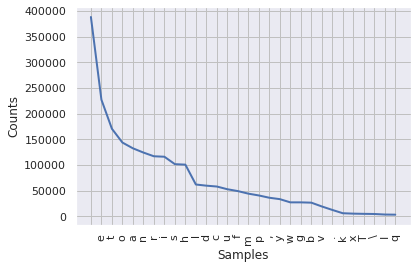

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
#find most common letters
fdist.most_common(25)

[(' ', 388172),
 ('e', 227191),
 ('t', 170576),
 ('o', 143748),
 ('a', 132530),
 ('n', 124272),
 ('r', 117029),
 ('i', 116125),
 ('s', 101684),
 ('h', 100712),
 ('l', 62052),
 ('d', 59794),
 ('c', 58120),
 ('u', 52852),
 ('f', 49229),
 ('m', 44273),
 ('p', 40728),
 (',', 36284),
 ('y', 33555),
 ('w', 27307),
 ('g', 27288),
 ('b', 26709),
 ('v', 19338),
 ('.', 12564),
 ('k', 6126)]

In [ ]:
#Checking for words from the list of most common letters
#LENGTH OF TIME DEPENDS ON LENGHT OF TEXT
#stm = ["e", "t", "o","a","n"]
#for word in file_df :
   #print(word)

In [ ]:
#Word tokenizer breaks text paragraph into words.
tokenized_word=word_tokenize(file_df)
#print(tokenized_word)

In [ ]:
#frequency distribution of words
fdist1 = FreqDist(tokenized_word)
print(fdist1)

<FreqDist with 12759 samples and 430242 outcomes>


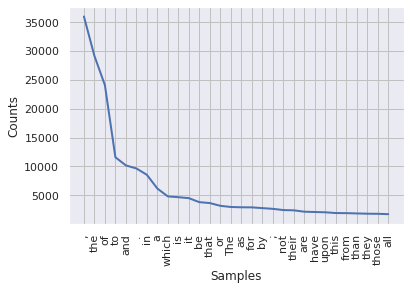

In [ ]:
# Frequency Distribution Plot 
import matplotlib.pyplot as plt
fdist1.plot(30,cumulative=False)
plt.show()

In [ ]:
#find most commong key words
fdist1.most_common(25)

[(',', 35943),
 ('the', 29129),
 ('of', 24059),
 ('to', 11584),
 ('and', 10175),
 ('.', 9651),
 ('in', 8547),
 ('a', 6167),
 ('which', 4813),
 ('is', 4677),
 ('it', 4510),
 ('be', 3818),
 ('that', 3661),
 ('or', 3186),
 ('The', 2981),
 ('as', 2930),
 ('for', 2918),
 ('by', 2787),
 (';', 2662),
 ('not', 2449),
 ('their', 2403),
 ('are', 2166),
 ('have', 2114),
 ('upon', 2065),
 ('this', 1933)]

In [ ]:
# split the text
#splitted_text = file_df.split() 
#print("Splitted text: ",splitted_text)

In [ ]:
# words which starts with "I":
words_start_with_I = [word for word in tokenized_word if word.startswith("I")]
print("Words with I: ",words_start_with_I) 

Words with I:  ['INTRODUCTION', 'Inquiry.\\', 'Industry', 'I', 'I', 'In', 'I', 'I.\\uc0\\u8232', 'IMPROVEMENT', 'IN', 'ITS', 'IS', 'I.\\uc0\\u8232', 'It', 'In', 'I', 'In', 'In', 'It', 'In', 'In', 'I', 'I', 'It', 'It', 'Independent', 'It', 'I', 'It', 'In', 'It', 'I', 'II.\\uc0\\u8232', 'It', 'It', 'I', 'In', 'In', 'I', 'It', 'In', 'In', 'III.\\uc0\\u8232', 'IS', 'In', 'In', 'It', 'In', 'In', 'It', 'Indies', 'In', 'In', 'It', 'Indians', 'India', 'IV.\\uc0\\u8232', 'In', 'In', 'India', 'India', 'I', 'In', 'If', 'Iron', 'In', 'In', 'It', 'I.', 'III', 'I', 'It', 'It', 'I', 'In', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'IN', 'IN', 'It', 'It', 'In', 'It', 'It', 'It', 'In', 'It', 'It', 'In', 'In', 'Its', 'Its', 'I', 'I', 'In', 'I', 'I', 'I', 'I', 'In', 'It', 'If', 'It', 'In', 'I', 'In', 'III', 'I.', 'In', 'I', 'I', 'In', 'If', 'In', 'In', 'I', 'In', 'In', 'If', 'It', 'In', 'If', 'In', 'In', 'In', 'In', 'In', 'In', 'In', 'In', 'III.', 'In', 'If', 'If', 'In', 'If', 'In', 'I', 'I.', 'I', 'In', 'I

In [ ]:
# words which starts with "M":
words_start_with_M = [word for word in tokenized_word if word.startswith("M")]
print("Words with M: ",words_start_with_M) 

Words with M:  ['Men', 'Many', 'Man', 'Many', 'MARKET.\\', 'Mediterranean', 'Mediterranean', 'Maese', 'Mediterranean', 'MONEY.\\', 'Many', 'Metals', 'Machpelah', 'MONEY.\\', 'Mr', 'Mary', 'Mr', 'Mr', 'MARKET', 'Many', 'Masters', 'Masters', 'Mr', 'Marco', 'Marriage', 'Many', 'Many', 'Mr', 'More', 'Masters', 'Mr', 'Messance', 'More', 'More', 'Mr', 'Money', 'Many', 'Mahometan', 'M.', 'Montesquieu', 'More', 'Many', 'Moderate', 'Many', 'Manufactures', 'More', 'Manchester', 'Madox', 'Many', 'Monopoly', 'March', 'March', 'March', 'Mr', 'Maryland', 'Maryland', 'Many', 'Mr.', 'Mining', 'Mary', 'Mr', 'Maur', 'Mr', 'Majestatem', 'Mr', 'Mr', 'Maur', 'Mr', 'Maur', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Maur', 'Mr', 'Messance', 'Mr', 'Mexico', 'Mexico', 'Muscovites', 'Moluccas', 'Manilla', 'Mr', 'Meggens', 'Merchant', 'Manilla', 'Mr', "Meggens\\'92", 'Many', 'Mexico', 'Mr', 'Mr', 'Mr', 'Memoirs', 'Mr', 'Messance', 'Mr', 'Maur', 'Many', 'Manufactures', 'Merchants', 'MARKET', 'MICHAELMAS', 'MEDIUM', 'MA

In [ ]:
# words which starts with "R":
words_start_with_R = [word for word in tokenized_word if word.startswith("R")]
print("Words with R: ",words_start_with_R) 

Words with R:  ['Roman', 'RANKS', 'Rhine', 'Romans', 'Romans', 'Rome', 'Roman', 'Roman', 'Roman', 'Robert', 'Roman', 'REAL', 'Romans', 'Rome', 'Rome', 'Roman', 'Rent', 'Rather', 'Ramuzzini', 'Rouen', 'Riding', 'Restoration', 'Roman', 'Roman', 'Roman', 'Roman', 'Rome', 'RENT', 'Rent', 'Rent', 'Rent.\\', 'Romans', 'Rome', 'Roman', 'Rome', 'Rent.\\', 'Rent', 'Rent', 'Rev', 'Rent', 'Rent', 'Rent', 'Rent.\\', 'Ralph', 'Romans.\\', 'Ruffhead', 'Regiam', 'Ruddiman', 'Rice', 'Russia', "Ruddiman\\'92s", 'Romans', 'Rome', 'Romans', 'Romans', 'Romans', 'Royal', 'Reflections', 'Revolution', 'Revenue', 'Rome', 'Rouen', 'Rouen', 'Rouen', 'Restoration', 'Restoration', 'Revolution', 'Restoration', 'Revolution', 'Riga', 'ROMAN', 'Roman', 'Roman', 'Romans', 'Romans', 'Romans', 'Russia', 'Rome', 'RISE', 'ROMAN', 'Roman', 'Roman', 'Remarkable', 'Roman', 'Rufus', 'Roman', 'RESTRAINTS', 'Revenge', 'RESTRAINTS', 'Restraints', 'Riga', 'Rix-dollars', 'Restraints', 'Remove', 'Rye', 'Revolution', 'Rome.\\', 'Rom

In [ ]:
# words which starts with "E":
words_start_with_E = [word for word in tokenized_word if word.startswith("E")]
print("Words with E: ",words_start_with_E) 

Words with E:  ['Europe', 'Each', 'England', 'England', 'England', 'England', 'England', 'England', 'Each', 'Every', 'European', 'Each', 'Even', 'Each', 'EXTENT', 'Edinburgh', 'Edinburgh', 'Edinburgh', 'Egypt', 'Egypt', 'Egypt', 'Egypt.\\', 'East', 'Egypt', 'Egyptians', 'Euxine', 'Europe', 'Euxine', 'Europe', 'Every', 'Ephron', 'England', 'English', 'Edward', 'England', 'Europe', 'English', 'English', 'English', 'English', 'Every', 'Every', 'Europe', 'Equal', 'Europe', 'Elizabeth', 'English', 'England', 'Equal', 'Equal', 'Every', 'England', 'Edward', 'England', 'Europe', 'England', 'Even', 'English', 'England', 'England', 'English', 'England', 'English', 'Europe', 'English', 'Europe', 'England', 'English', 'English', 'English', 'England', 'English', 'England', 'England', 'Edward', 'Europe', 'Even', 'Egypt', 'Europe', 'England', 'England', 'England', 'England', 'European', 'Europe', 'Europe', 'Europe', 'European', 'Every', 'English', 'East', 'East', 'Eighteen', 'Edinburgh', 'England', '

In [ ]:
# words which starts with "W":
words_start_with_W = [word for word in tokenized_word if word.startswith("W")]
print("Words with W: ",words_start_with_W) 

Words with W:  ['WORK.\\', 'Whatever', 'Whatever', 'WHICH', 'We', 'When', 'When', 'Whoever', 'What', 'Were', 'WHICH', 'Whether', 'When', 'Whoever', 'We', 'With', 'When', 'When', 'Whereas', 'Were', 'What', 'When', 'West', 'William', 'William', 'What', 'What', 'What', 'Wealth', 'When', 'When', 'We', 'We', 'We', 'We', 'William', 'Were', 'When', 'With', 'When', 'When', 'Wages', 'Whoever', 'When', 'West', 'What', 'Whatever', 'Wages', 'When', 'When', 'When', 'When', 'While', 'When', 'Whatever', 'When', 'WAGES', 'What', 'We', 'We', 'We', 'When', 'When', 'When', 'We', 'Want', 'Wages', 'With', 'Western', 'When', 'Where', 'Where', 'Workmen', 'We', 'West', 'What', 'When', 'We', 'When', 'When', 'West', 'What', 'When', 'When', 'West', 'When', 'When', 'What', 'Were', 'WAGES', 'When', 'What', 'Where', 'Where', 'When', 'When', 'Whether', 'We', 'When', 'While', 'When', 'What', 'Without', 'Where', 'Where', 'When', 'When', 'When', 'When', 'When', 'Whereas', 'When', 'Wolverhampton', 'Where', 'When', 'What

In [ ]:
#UNIQUE WORDS
print("unique words: ",set(tokenized_word))  

unique words:  {'tolerably', 'ago.\\', 'simple', '1294', 'ceded', 'where', 'mum', 'zeal', 'teeth', 'anciently', 'talents', 'conveys', 'accompanied', 'prematurely', 'stallage', 'coal-pit', 'cod', 'blunt', 'Russia', 'attorneys', 'the\\', 'scorched', 'properest', 'manuscript', 'recoinage', 'cared', 'more', 'abbot', 'harbour', "\\'a3310,745", 'Gottenburgh', 'play-fellows', 'archbishop', 'deep', 'intimidated', 'Solorzano', 'enormities', 'unfortunate', 'proposing', 'varies', 'fleet', 'great', 'proverbs', 'attract', 'special', 'corn-fields.\\', 'Bruce', 'penalties', 'effectual.\\', 'subsists', 'you', "\\'a35,855,580", 'extensive', 'foresight', 'revolution', '1st', 'depart', 'substantial', '1-4th', 'Celtes', 'ashamed', 'flourished', 'Orange', 'fear', 'Merchant', 'dispersed', 'match', 'inconsiderable', 'suggests', 'tells', 'Duties.\\', 'measure', 'converse', 'soils', '4/5ths', 'dated', 'Avarice', 'generosity', 'elapsed', '3:19s', 'incumbered', '16th', 'Winchester', '1720', 'unaccountable', 'exa

In [ ]:
import itertools
import time
import sys
import sys
import os

In [ ]:
#separate each features in line
for i in range(len(article)):
  article[i] = article[i].split(",")

print(article)

[['{\\rtf1\\ansi\\ansicpg1252\\cocoartf2636\n\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\froman\\fcharset0 Times-Roman;\\f1\\froman\\fcharset0 Times-Italic;\\f2\\fmodern\\fcharset0 Courier;\n}\n{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;}\n{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;}\n{\\info\n{\\author max_the_analyst}}\\margl1440\\margr1440\\vieww12000\\viewh11720\\viewkind0\n\\deftab720\n\\pard\\pardeftab720\\sa1120\\qc\\partightenfactor0\n\n\\f0\\fs56 \\cf0 \\expnd0\\expndtw0\\kerning0\n\\outl0\\strokewidth0 \\strokec2 INTRODUCTION AND PLAN OF THE WORK.\\\n\\pard\\pardeftab720\\fi240\\sa60\\qj\\partightenfactor0\n\n\\fs24 \\cf0 The annual labour of every nation is the fund which originally supplies it with all the necessaries and conveniencies of life which it annually consumes', ' and which consist always either in the immediate produce of that labour', ' or in what is purchased with that produce from other nations.\\\nAccording', ' therefore', ' as thi

In [ ]:
#Transposing 
new_mat=zip(*article)
for row in new_mat:
    print(row)

Streaming output truncated to the last 5000 lines.
(' to be taxed at nine hundred',)
(' the other at eleven hundred livres',)
(' are',)
(' by the old assessment',)
(' both taxed at a thousand livres. Both these districts are',)
(' by the additional tax',)
(' rated at eleven hundred livres each. But this additional tax is levied only upon the district under-charged',)
(' and it is applied altogether to the relief of that overcharged',)
(' which consequently pays only nine hundred livres. The government neither gains nor loses by the additional tax',)
(' which is applied altogether to remedy the inequalities arising from the old assessment. The application is pretty much regulated according to the discretion of the intendant of the generality',)
(' and must',)
(' therefore',)
(' be in a great measure arbitrary.\\\nTaxes which are proportioned',)
(' not in the Rent',)
(' but to the Produce of Land.\\\nTaxes upon the produce of land are',)
(' In reality',)
(' taxes upon the rent; and thoug

In [ ]:
#flatten
#b = list(itertools.chain.from_iterable(article))
#print(b)

In [ ]:
#tokenizing
#text= file_df
#tokenized_text=sent_tokenize(text)
#SO = print(tokenized_text)

In [ ]:
# split the text
#splitted_text = file_df.split() # default split methods splits text according to spaces
#print("Splitted text: ",splitted_text) 

In [ ]:
# normalization
#words = file_df
words_list = file_df.lower().split(" ")
#print("normalized words: ",words_list)

In [ ]:
import nltk as nlp

In [ ]:
# stemming
stemming_word_list = file_df
porter_stemmer = nlp.PorterStemmer()
roots = [porter_stemmer.stem(each) for each in stemming_word_list]
#print("Stemming Words: ",roots)

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# lemmatization
lemma = nlp.WordNetLemmatizer()
lemma_roots = [lemma.lemmatize(each) for each in stemming_word_list]
#print("Lemmatization: ",lemma_roots)

In [ ]:
# stemming
porter_stemmer = nlp.PorterStemmer()
roots = [porter_stemmer.stem(each) for each in words_list]
#print("Root Stemming: ",roots)

In [ ]:
# !pip install sentencepiece
!pip install bert-for-tf2
import bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
